### **FINM 33165 (Autumn 2023) - Assignment 4**

* Yumeng Zhang (12372205)
* ymzhang@uchicago.edu

#### **Introduction**

In this assignment, we are going to implement the deterministic Encoder part of a Denoising Diffusion Probabilistic Model (DDPM). The model will input an image, then we sequentially add Gaussian noise to the image over T timestemps, and turn the image into white noise.

#### **Input the Image**

In [1]:
from PIL import Image
import numpy as np
import torch

image = Image.open('image.png').convert('RGB')
image = image.resize((600, 600))
image_array = np.array(image)
image_tensor = torch.tensor(image_array, dtype=torch.float32).permute(2, 0, 1) 

print(image_tensor.shape)

torch.Size([3, 600, 600])


Original Image:


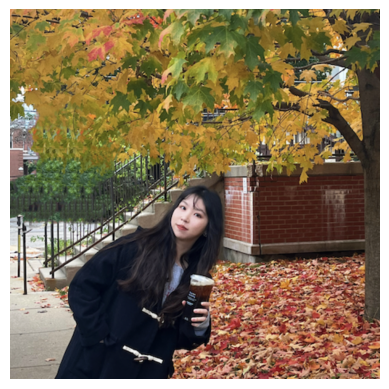

In [2]:
import matplotlib.pyplot as plt

def show_plot(image_tensor):

    plt.imshow(image_tensor.permute(1, 2, 0) / 255)
    plt.axis('off')  
    plt.show()

print("Original Image:")   # It was me at FinMath on Halloween.
show_plot(image_tensor)

#### **Add Gaussian Noise to the Image**

Assume x is the original image, and $z_t$ represents the image that we have done $t$ steps of noise adding, we are going to have a sequence of random variables $x, z_1, z_2, ... , z_T$. The sequence is a Markov chain with transition distributions $q(z_{t+1}|z_t) = \mathcal{N}(\sqrt{\alpha_t}z_t, (1-\alpha_t)\mathcal{I})$.

It follows that $z_{t+1} = \sqrt{\alpha_t}z_t + \sqrt{(1-\alpha_t)}\epsilon$, where $\epsilon \sim \mathcal{N}(0,\mathcal{I})$.

Take $z_1$ as an example, and set $\alpha = 0.99$:

In [3]:
x = image_tensor
epsilon = torch.randn_like(x) 

alpha = torch.tensor(0.99)

z1 = torch.sqrt(alpha) * x + torch.sqrt(1 - alpha) * epsilon

In [4]:
print("original image tensor:")
print(x)

original image tensor:
tensor([[[218., 210., 211.,  ..., 160., 155., 104.],
         [216., 209., 210.,  ..., 168., 135.,  61.],
         [212., 206., 209.,  ..., 170., 109.,  19.],
         ...,
         [146., 148., 146.,  ..., 148., 198., 214.],
         [148., 147., 147.,  ..., 131., 181., 209.],
         [147., 143., 146.,  ..., 192., 194., 213.]],

        [[157., 145., 143.,  ..., 152., 150., 103.],
         [149., 140., 142.,  ..., 158., 130.,  62.],
         [141., 136., 142.,  ..., 156., 104.,  20.],
         ...,
         [139., 140., 138.,  ...,  94., 138., 153.],
         [140., 140., 141.,  ...,  79., 121., 148.],
         [138., 136., 139.,  ..., 140., 136., 152.]],

        [[104.,  92.,  90.,  ...,  90.,  91.,  58.],
         [ 97.,  88.,  89.,  ...,  94.,  77.,  29.],
         [ 90.,  84.,  89.,  ...,  93.,  62.,   6.],
         ...,
         [127., 129., 128.,  ...,  80., 115., 125.],
         [128., 128., 128.,  ...,  66., 101., 121.],
         [127., 123., 126.,  .

In [5]:
print("image tensor after adding noise for one step:")
print(z1)

image tensor after adding noise for one step:
tensor([[[216.8389, 208.8710, 209.9203,  ..., 159.0365, 154.2590, 103.6660],
         [214.8966, 207.8441, 209.0004,  ..., 167.1148, 134.2417,  60.6470],
         [211.0397, 204.9410, 208.0840,  ..., 169.2780, 108.5186,  18.9946],
         ...,
         [144.9982, 147.3973, 145.2572,  ..., 147.2172, 196.8992, 212.9855],
         [147.3997, 146.1044, 146.2080,  ..., 130.4384, 180.2135, 207.9427],
         [146.1742, 142.2173, 145.3390,  ..., 190.9412, 192.9531, 212.0393]],

        [[156.2042, 144.2530, 142.1824,  ..., 151.3195, 149.3537, 102.4090],
         [148.2240, 139.4454, 141.3329,  ..., 157.3593, 129.2708,  61.7267],
         [140.3777, 135.3773, 141.2868,  ..., 155.2778, 103.5500,  19.8814],
         ...,
         [138.2438, 139.3995, 137.1907,  ...,  93.4660, 137.2774, 152.3654],
         [139.1654, 139.2758, 140.2117,  ...,  78.5003, 120.3151, 147.2887],
         [137.3588, 135.3432, 138.3708,  ..., 139.2316, 135.3055, 151.3133]],

Now we make a descending sequence of $\alpha$'s length of 500 and sequentially add noise to the image to generate increasingly noisy images $z_t$.

In [6]:
alpha_list = np.linspace(0.99, 0.5, 500)

image_list = []
image_list.append(x)

epsilon = torch.randn_like(x)

for alpha in alpha_list:

    alpha = torch.tensor(alpha)

    z_t = image_list[-1]
    z_t1 = torch.sqrt(alpha) * z_t + torch.sqrt(1 - alpha) * epsilon
    image_list.append(z_t1)

In [7]:
import torchvision.transforms as transforms

def show_plot(image_tensor):

    image_to_show = transforms.ToPILImage()(image_tensor)

    plt.imshow(image_to_show)
    plt.axis('off')  
    plt.show()

z1  alpha = 0.99


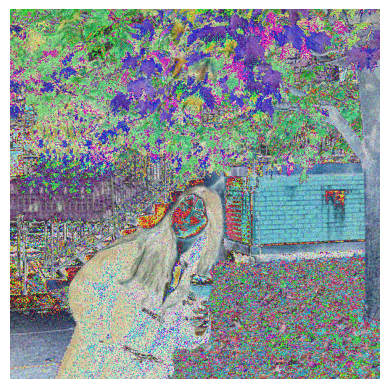

In [8]:
image_index = 0

print("z1  alpha =", alpha_list[image_index])
show_plot(image_list[image_index+1])

z2  alpha = 0.9890180360721442


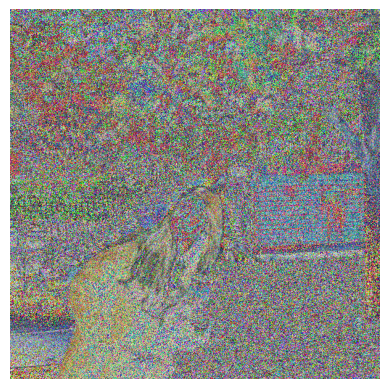

In [9]:
image_index = 1

print("z2  alpha =", alpha_list[image_index])
show_plot(image_list[image_index+1])

z3  alpha = 0.9880360721442886


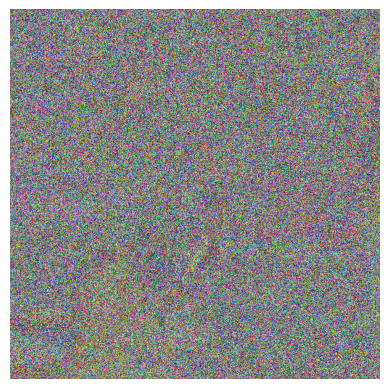

In [10]:
image_index = 2

print("z3  alpha =", alpha_list[image_index])
show_plot(image_list[image_index+1])

z500  alpha = 0.5


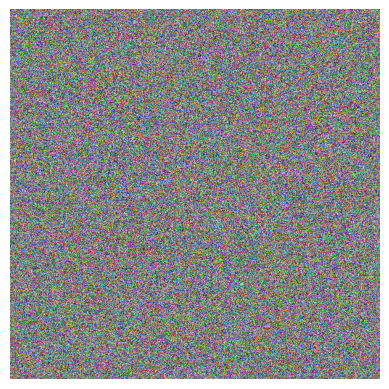

In [11]:
image_index = 499

print("z500  alpha =", alpha_list[image_index])
show_plot(image_list[image_index+1])

#### **Estimate $z_T$ to White Noise**

In [13]:
z_T = image_list[-1]

num_samples = 100
white_noise = torch.randn(num_samples, *z_T.shape)

squared_diffs1 = (white_noise - z_T)**2
average_squared_diffs1 = torch.mean(squared_diffs1, dim=(0, 1, 2, 3))
print("Average of squared differences between zT and white noise:", round(average_squared_diffs1.item(),2))

z_0 = image_list[0]

squared_diffs2 = (white_noise - z_0)**2
average_squared_diffs2 = torch.mean(squared_diffs2, dim=(0, 1, 2, 3))
print("Average of squared differences between original image and white noise:", round(average_squared_diffs2.item(),2))

Average of squared differences between zT and white noise: 6.88
Average of squared differences between original image and white noise: 12322.17


According to the above result, we could see that comparing with the original image, after adding Gaussian noises, $z_T$ is much closer to the white noise.